# Matplotlib Practice

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading and Analyzing the Data

In [2]:
df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')

In [3]:
df

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


In [4]:
df.describe()

,tavg,tmin,tmax,prcp
count,11824.000000,10505.000000,11265.000000,7274.000000
mean,23.840426,19.385131,29.932827,4.414119
std,2.309899,2.367239,2.957866,12.994655
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.100000,27.900000,0.000000
50%,23.500000,19.800000,29.500000,0.000000
75%,25.200000,20.800000,32.000000,2.000000
max,32.400000,27.900000,39.200000,271.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [6]:
df.loc[(df['prcp'] == 271.3)]

,time,tavg,tmin,tmax,prcp
6402,13-07-2007,23.2,NaN,29.2,271.3


### Separating the Data yearwise

In [7]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [8]:
dfs_by_year = {year: df[df['time'].dt.year == year] for year in df['time'].dt.year.unique()}

In [9]:
df_1990 = dfs_by_year[1990]
df_1991 = dfs_by_year[1991]
df_1992 = dfs_by_year[1992]
df_1993 = dfs_by_year[1993]
df_1994 = dfs_by_year[1994]
df_1995 = dfs_by_year[1995]
df_1996 = dfs_by_year[1996]
df_1997 = dfs_by_year[1997]
df_1998 = dfs_by_year[1998]
df_1999 = dfs_by_year[1999]
df_2000 = dfs_by_year[2000]
df_2001 = dfs_by_year[2001]
df_2002 = dfs_by_year[2002]
df_2003 = dfs_by_year[2003]
df_2004 = dfs_by_year[2004]
df_2005 = dfs_by_year[2005]
df_2006 = dfs_by_year[2006]
df_2007 = dfs_by_year[2007]
df_2008 = dfs_by_year[2008]
df_2009 = dfs_by_year[2009]
df_2010 = dfs_by_year[2010]
df_2011 = dfs_by_year[2011]
df_2012 = dfs_by_year[2012]
df_2013 = dfs_by_year[2013]
df_2014 = dfs_by_year[2014]
df_2015 = dfs_by_year[2015]
df_2016 = dfs_by_year[2016]
df_2017 = dfs_by_year[2017]
df_2018 = dfs_by_year[2018]
df_2019 = dfs_by_year[2019]
df_2020 = dfs_by_year[2020]
df_2021 = dfs_by_year[2021]
df_2022 = dfs_by_year[2022]

In [10]:
for year in range(1990, 2023):
    file_name = f"Temperature in {year}.csv"
    dynamic_df = globals().get(f"df_{year}")
    dynamic_df.to_csv(file_name, index=False)

### Bar Data

Preparation of Bar Analysis

In [11]:
years = [f"{year}" for year in range(1990, 2023)]

In [12]:
tavg = []
for year in range(1990, 2023):
    dynamic_df = globals().get(f"df_{year}")
    tavg.append(float((dynamic_df.describe()).iloc[1, 1]))

In [13]:
tmin = []
for year in range(1990, 2023):
    dynamic_df = globals().get(f"df_{year}")
    tmin.append(float((dynamic_df.describe()).iloc[1, 2]))

In [14]:
tmax = []
for year in range(1990, 2023):
    dynamic_df = globals().get(f"df_{year}")
    tmax.append(float((dynamic_df.describe()).iloc[1, 3]))

In [15]:
prcp = []
for year in range(1990, 2023):
    dynamic_df = globals().get(f"df_{year}")
    prcp.append(float((dynamic_df.describe()).iloc[1, 4]))

In [16]:
bar_data = {"Average Temperature": tavg,
            "Minimum Temperature": tmin,
            "Maximum Temperature": tmax,
            "Precipitation": prcp}

Creation of Bar Data

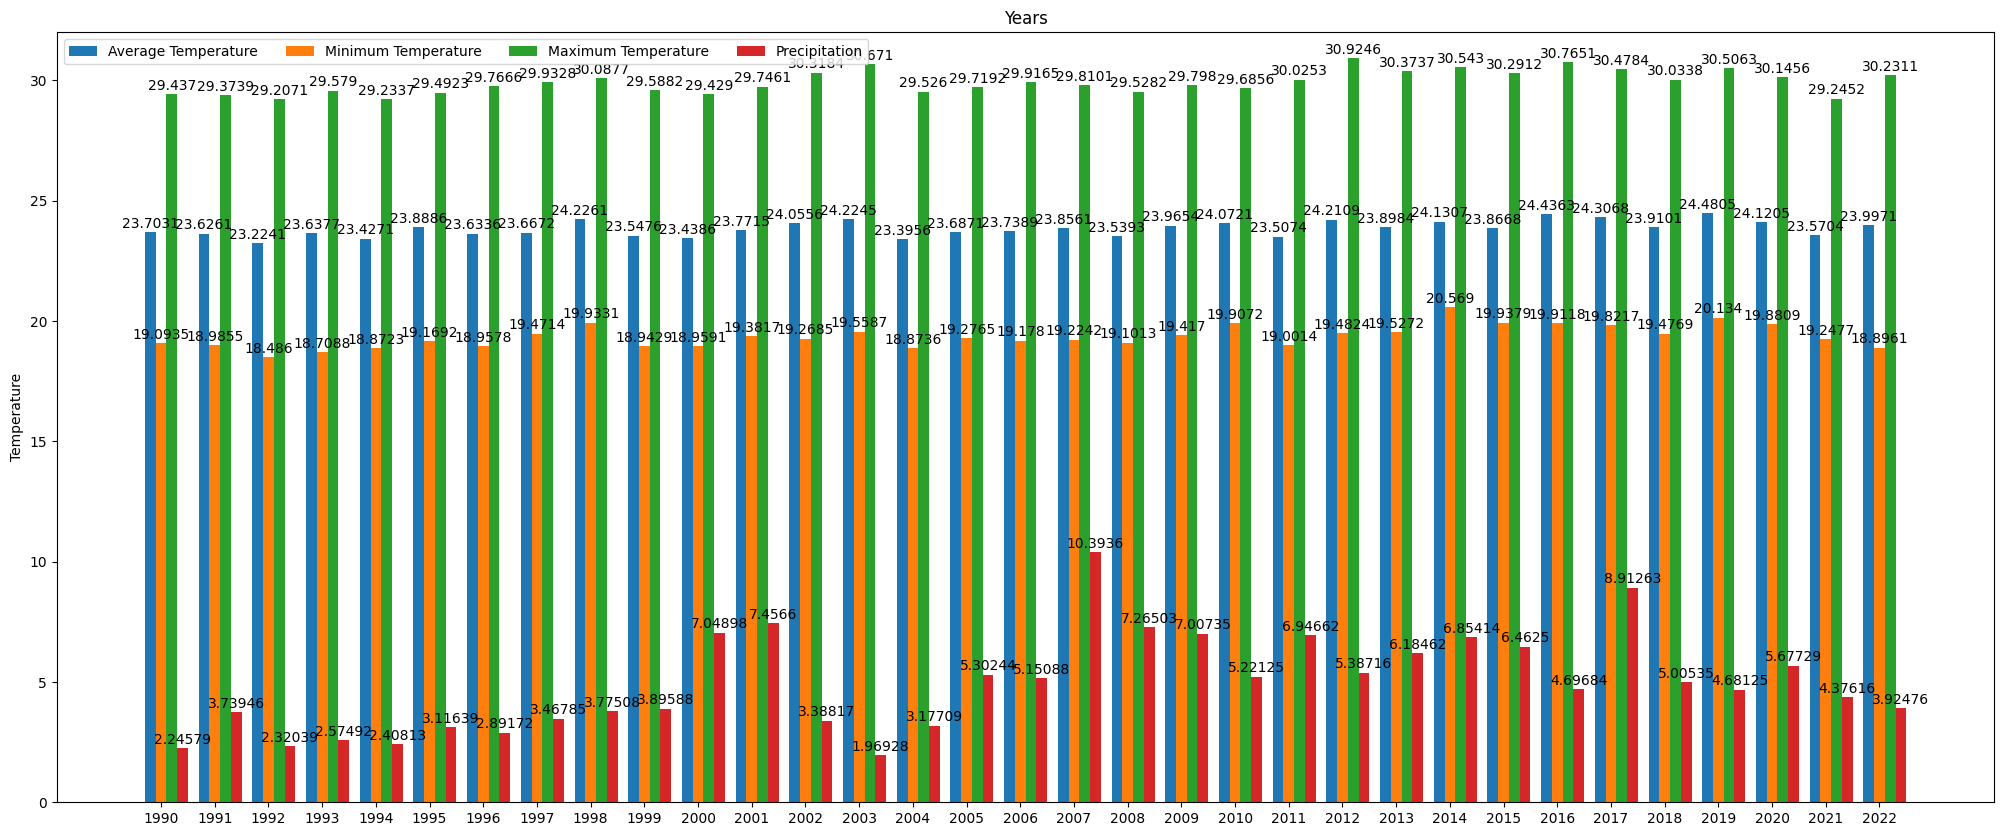

In [17]:
x = np.arange(len(years)) * 1.25
width = 0.25
multiplier = 0

fig, ax = plt.subplots(figsize=(25, 10))

for attribute, measurement in bar_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1
ax.set_ylabel('Temperature')
ax.set_title('Years')
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 32)

plt.show()

### Graphical Representation of data

Average Temperature Plotting

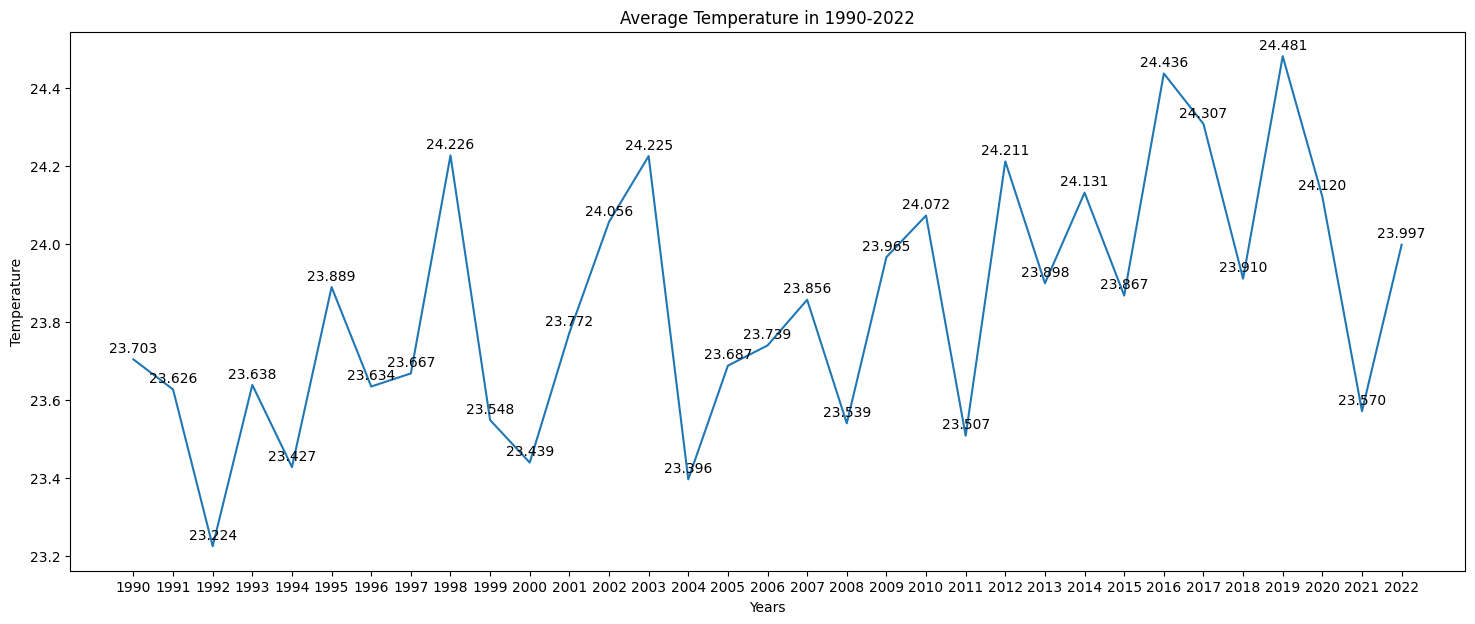

In [18]:
fig, ax = plt.subplots(figsize=(18,7))

ax.set_title("Average Temperature in 1990-2022")

plt.ylabel('Temperature')
plt.xlabel('Years')

plt.plot(years, tavg)
for x, y in zip(years, tavg):                                      
    ax.annotate(f'{y:.3f}', xy=(x, y), textcoords='offset points', xytext=(0,5), ha='center')

plt.show()

Maximum Temperature Plotting

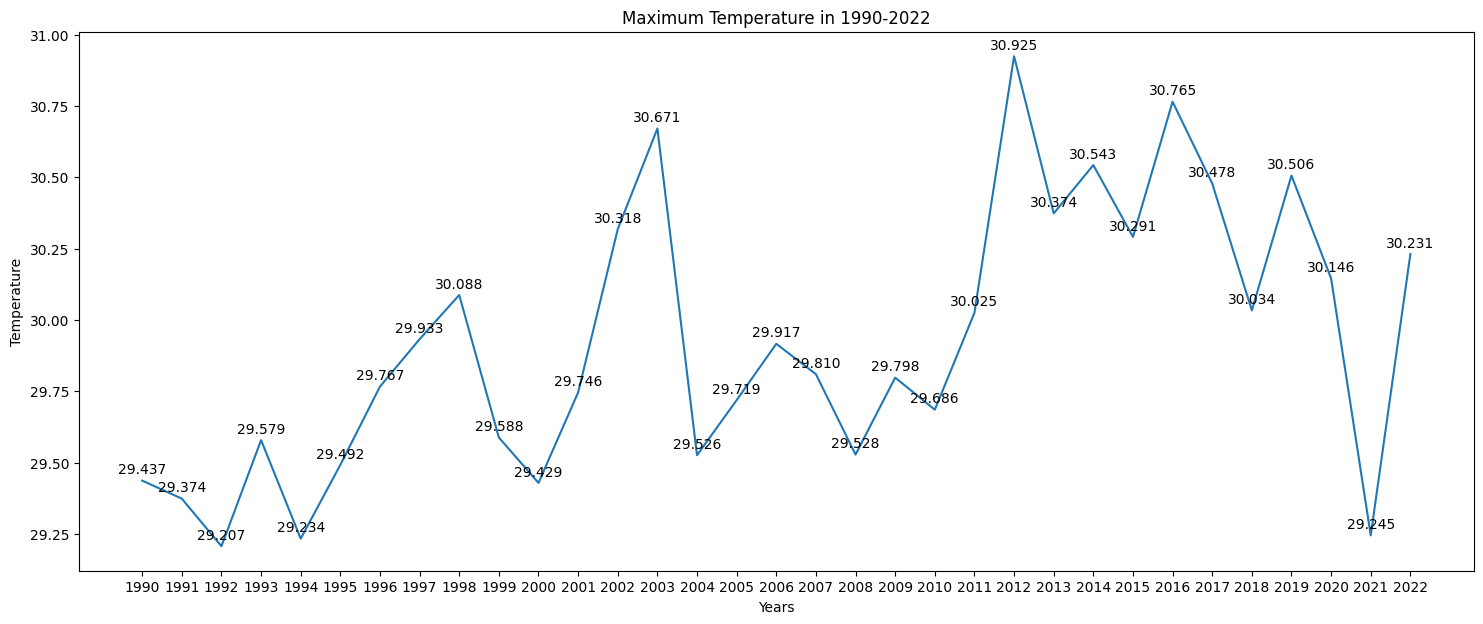

In [19]:
fig, ax = plt.subplots(figsize=(18,7))

ax.set_title("Maximum Temperature in 1990-2022")

plt.ylabel('Temperature')
plt.xlabel('Years')

plt.plot(years, tmax)
for x, y in zip(years, tmax):                                      
    ax.annotate(f'{y:.3f}', xy=(x, y), textcoords='offset points', xytext=(0,5), ha='center')

plt.show()

Minimum Temperature Plotting

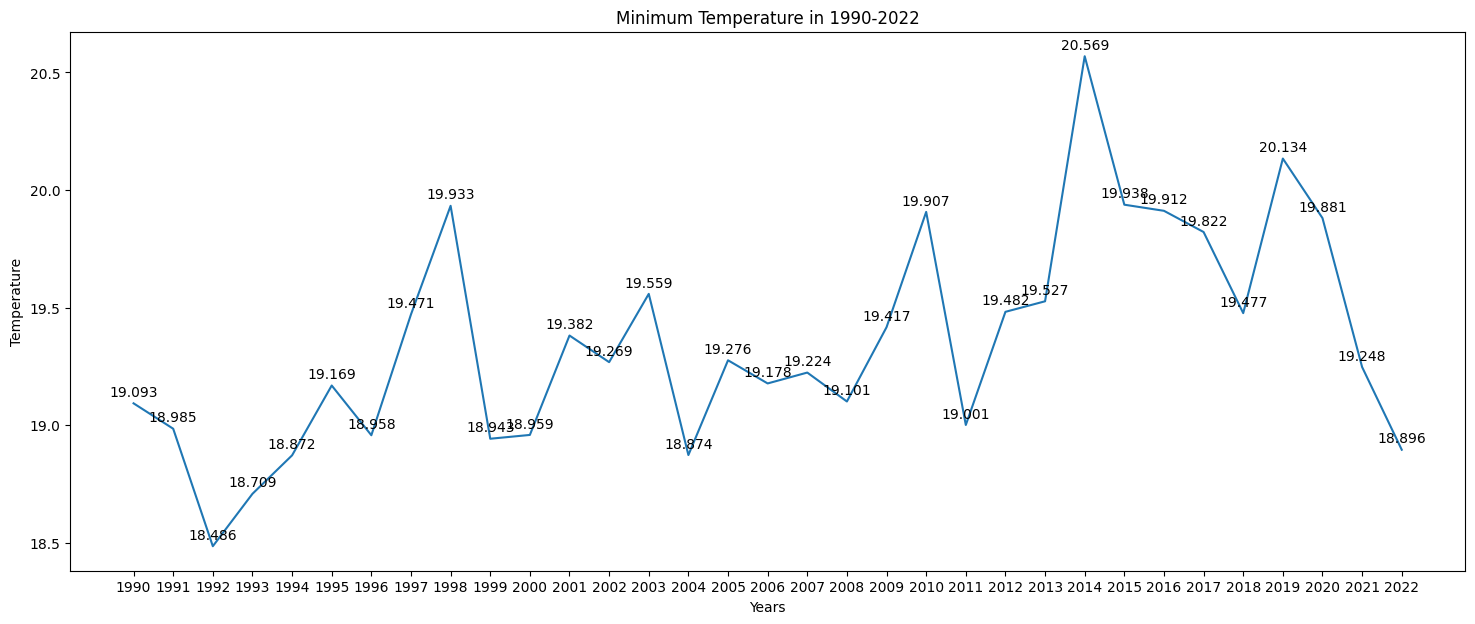

In [20]:
fig, ax = plt.subplots(figsize=(18,7))

ax.set_title("Minimum Temperature in 1990-2022")

plt.ylabel('Temperature')
plt.xlabel('Years')

plt.plot(years, tmin)
for x, y in zip(years, tmin):                                      
    ax.annotate(f'{y:.3f}', xy=(x, y), textcoords='offset points', xytext=(0,5), ha='center')

plt.show()

Precipitation Plotting

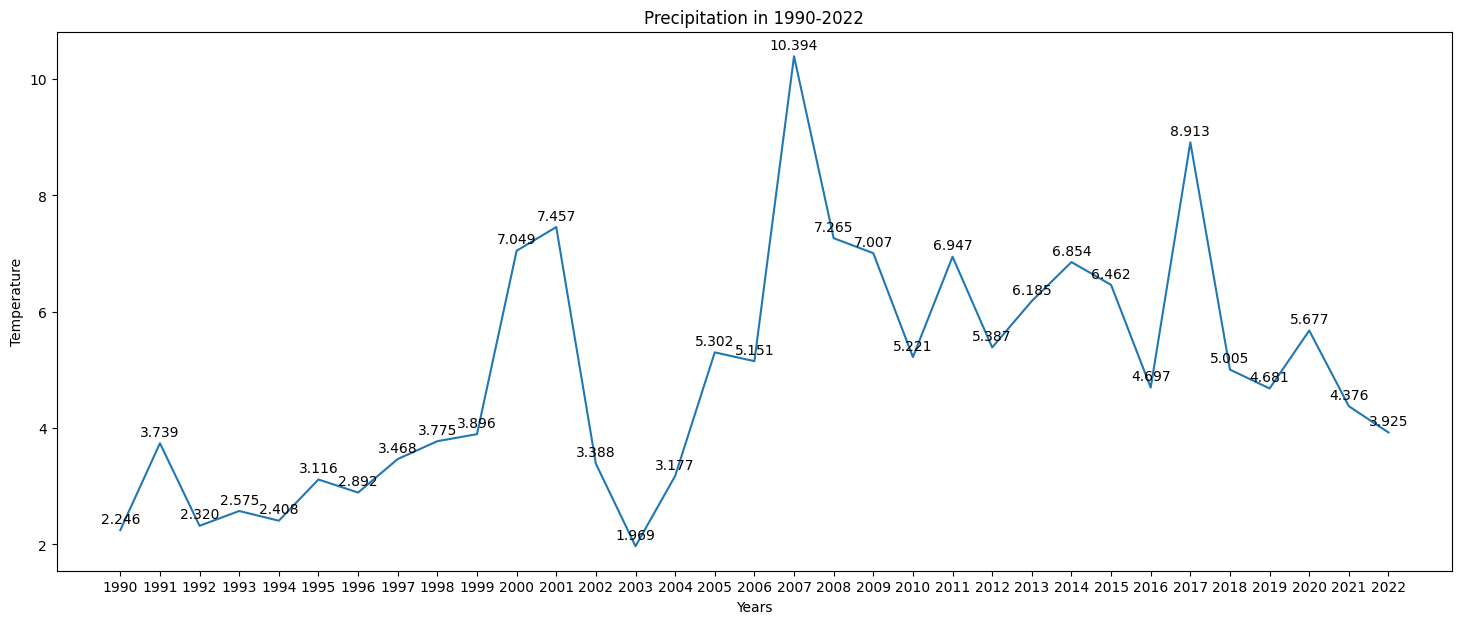

In [21]:
fig, ax = plt.subplots(figsize=(18,7))

ax.set_title("Precipitation in 1990-2022")

plt.ylabel('Temperature')
plt.xlabel('Years')

plt.plot(years, prcp)
for x, y in zip(years, prcp):                                      
    ax.annotate(f'{y:.3f}', xy=(x, y), textcoords='offset points', xytext=(0,5), ha='center')

plt.show()

### Pie Charts

Data Preparation

In [22]:
lists_dict = {}
for i in range(33):
    lists_dict[f'measure_{i}'] = [tavg[i], tmax[i], tmin[i], prcp[i]]

Pie Chart Making

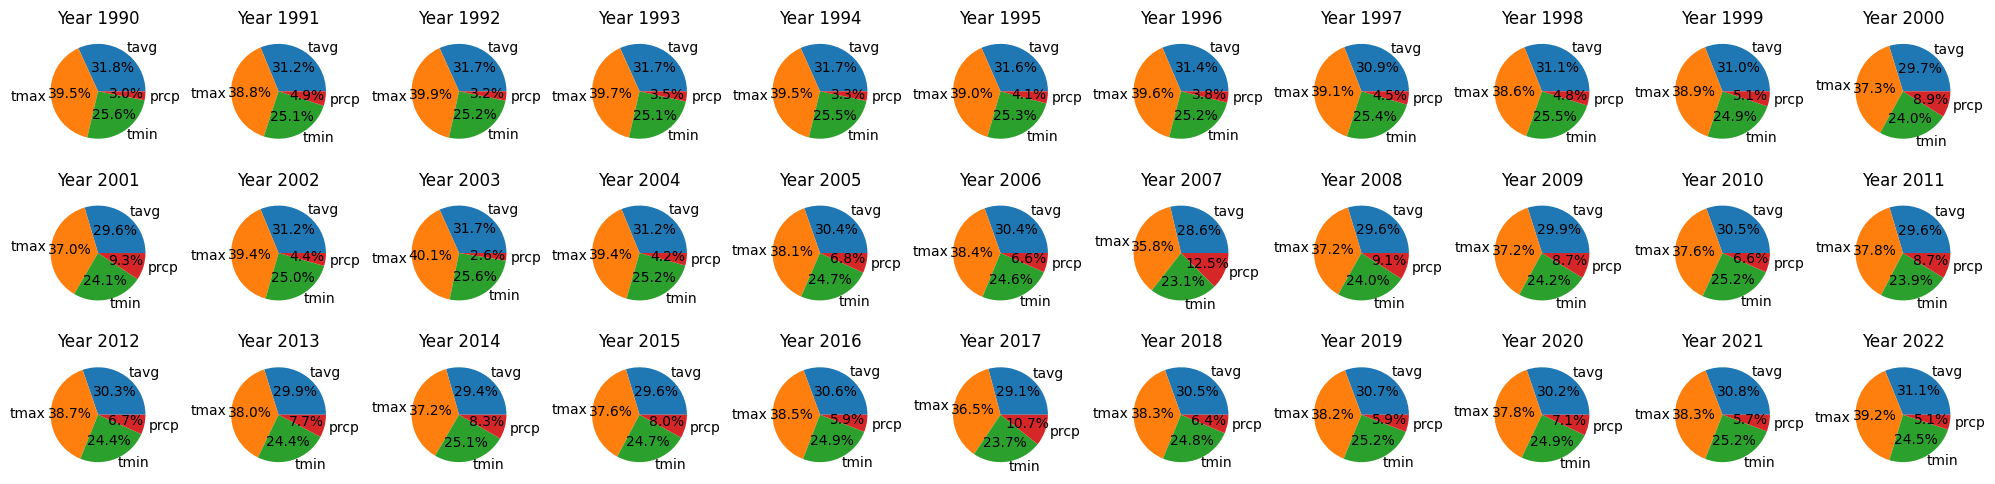

In [23]:
param = ['tavg', 'tmax', 'tmin', 'prcp']

num_pies = 33
rows, cols = 3, 11
fig, ax = plt.subplots(rows, cols, figsize=(20, 5))
ax = ax.flatten()

for i in range(33):
    ax[i].pie(lists_dict[f'measure_{i}'], labels=param, autopct='%1.1f%%')
    ax[i].set_title(f"Year {i+1990}")

for j in range(num_pies, rows * cols):
    fig.delaxes(ax[j])

plt.tight_layout()